In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from numpy import median

isoler les data les plus pertinentes : 1/ comprendre les blocs de variables, go voir leur def sur le site
question posée :quelles st les variables pr quantifier le potentiel marketgin d'un pays ?
ID au moins 4 var en lien avec l'étude (oe non y en aura plus)
puis : 2/qualité des données une fois qu'on a trouvé ce qu'on veut.
taux de remplissage par pays, données anciennes ou prospectives (à nettoyer aussi)
retirer les pays avec peu / pas de data

D'un pt de vue technique : récup la dernière valeur nn nulle pr chaque var retenue
Donc une fonction à coder 

Pr les var sélectionnées : il faut s'assurer que les var select le remplissage est complet pr la quasi tot des pays

Filtre sur la pop minimale peut aider à ça (???)

ANALYSE DE DONNEES : but = proposer une liste de pays potentiels pr l'appli
filtrer les pays à partir de seuils mini définis pr chaque var
Ou score de var combiné et seuil sur ce score
Score d'attractivité par pays pour classer les pays
Analyser les var pour sélectionner les pays à fort potentiel

In [49]:
Data=pd.read_csv("projet1_data/EdStatsData.csv" , sep=",") #data classées / années avec indicator code

Series=pd.read_csv("projet1_data/EdStatsSeries.csv" , sep= ",") #series codes et descriptions des var qui vont m'interesser

Series.shape

# data = 886930 lignes et 70 colonnes
# 3665 variables / pays
# 242 pays et régions


(3665, 20)

In [50]:
#####################################################################
######################### CLEANER LES DATA ##########################
#####################################################################

colonnes=Series.columns.tolist()
#print(Series['Topic'].unique())
topics=Series['Topic'].unique()  #utiliser le topic pour selectionner les gdes categories avc des variables pertinentes

Series.set_index('Topic',inplace=True) #colonne 'topic' en index

toDrop=['Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
 'Learning Outcomes',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita','Early Child Development (SABER)','Teachers (SABER)',
 'Primary','Early Childhood Education','Pre-Primary','Expenditures','Health: Risk factors','Health: Mortality',
 'Social Protection & Labor: Labor force structure', 
 'Social Protection & Labor: Unemployment','EMIS','Teachers','Education Management Information Systems (SABER)',
 'Engaging the Private Sector (SABER)','School Health and School Feeding (SABER)','School Autonomy and Accountability (SABER)',
 'School Finance (SABER)','Workforce Development (SABER)','Student Assessment (SABER)', 'Tertiary Education (SABER)',
 'Health: Population: Structure','Background'] #liste des gdes categories a enlever
#'Economic Policy & Debt: Purchasing power parity',
for drop in toDrop: 
    #print(Series.shape[0])
    Series.drop([drop],inplace=True)

print(Series.index.unique()) #liste des index restants
#print(Series.shape[0])
Series.to_csv(r'C:\Users\camille.besancon\Documents\Projet1\projet1_data\filtre1.csv')




Index(['Attainment', 'Economic Policy & Debt: Purchasing power parity',
       'Education Equality', 'Health: Population: Dynamics',
       'Infrastructure: Communications', 'Laber', 'Literacy', 'Population',
       'Post-Secondary/Non-Tertiary', 'Secondary', 'Tertiary'],
      dtype='object', name='Topic')


Reste encore 1843 lignes. Je garde les catégories laber / infrastructure telles quelles car elles font peu de lignes.
Il faut refiltrer les autres catégories -> Patterns dans les Series Codes pour filtrer (valeurs d'âge, tag pour la primar education, valeurs projectives)

In [51]:
dfbase=Series.loc[['Infrastructure: Communications','Laber'],] 

toAdd=Series[Series['Series Code'].str.contains('15')]

filtreDel='(PRM|PRJ|CMPT|.FE|.MA|YRS)' #PRM = primary school / PRJ = projections / CMPT = parcours schol complete, on s'en fiche
filtre = toAdd['Series Code'].str.contains(filtreDel) #lignes qu'on ne veut pas select avec le filtre
toAdd = toAdd[~filtre] # selection des lignes qu'on veut
######################################################################################
#toAdd.reset_index(inplace=True)
#toAdd.set_index('Series Code',inplace=True)
#toDrop=[toAdd[index.str.contains('PRM')]] #liste
#for drop in toDrop: 
#    toAdd.drop([drop],inplace=True)
#toAdd.reset_index(inplace=True)
#toAdd.set_index('Topic',inplace=True)
#print(toAdd.columns)
######################################################################################
liste=[dfbase,toAdd]

filtre2=pd.concat(liste)
print(filtre2.shape[0])
filtre2.to_csv(r'C:\Users\camille.besancon\Documents\Projet1\projet1_data\filtre2.csv')




35


C:\Users\CAMILL~1.BES\AppData\Local\Temp/ipykernel_1780/659451469.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  filtre = toAdd['Series Code'].str.contains(filtreDel) #lignes qu'on ne veut pas select avec le filtre


Plus que 35 variables, comme c'est plus facile à appréhender et que je pense aller plus vite comme ça qu'en rajoutant des filtres qui enlèveront peu de lignes à chaque fois, je suis allée chercher à la main les codes des variables qui m'intéressent le plus.
Y a certaines catégories qui ont sauté aussi, mais je devrais avoir de quoi faire avec ce qu'il y a ici. J'ai enlevé les var spécifiques pour hommes / femmes, mm si c'est intéressant dans l'absolu, ce n'est pas la priorité

In [52]:
varFinal='(NY.GDP.PCAP.CD|IT.CMP.PCMP.P2|IT.NET.USER.P2|BAR.NOED.15UP.ZS|BAR.SEC.ICMP.15UP.ZS|BAR.TER.ICMP.15UP.ZS|UIS.LP.Ag15t99|SP.POP.1524.TO.UN)'
filtreFinal = filtre2['Series Code'].str.contains(varFinal)
final_var=filtre2[filtreFinal]
# pour avoir les descriptions depuis le doc du series code

#####################################################################
################## Appliquer le filtre aux datas ####################
#####################################################################

Data.head()
#print(Data.shape[0])
#886930 lignes

selectVar = Data['Indicator Code'].str.contains(varFinal)

data_filtered=Data[selectVar]
data_filtered.to_csv(r'C:\Users\camille.besancon\Documents\Projet1\projet1_data\data_filtered.csv')
#print(data_var.shape[0])
#1452 lignes

C:\Users\CAMILL~1.BES\AppData\Local\Temp/ipykernel_1780/2445204900.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  filtreFinal = filtre2['Series Code'].str.contains(varFinal)
C:\Users\CAMILL~1.BES\AppData\Local\Temp/ipykernel_1780/2445204900.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  selectVar = Data['Indicator Code'].str.contains(varFinal)


remplissage / pays -> pourcentage col vides pour suppr les années où y a pas de données

In [53]:
 ######################## TAUX DE REMPLISSAGE PAR PAYS  ########################
data_filtered.reset_index
data_filtered = data_filtered.iloc[: , :-1]
colonnes=data_filtered.columns.tolist()
#colonnes

data_filtered.set_index('Country Code',inplace=True)
countryCodes=data_filtered.index.unique()


Bcp de valeurs anciennes pas remplies, un peu pour 1970, mais après plus rien -> pas utile. A dropper ainsi que ttes les colonnes date > 2016. Ce choix est fait car après 2016: remplissage pas terrible.

**plot des taux de remplissage de colonnes / année ?**

In [54]:

data_filtered_val=data_filtered.iloc[:,3:] #data seulements sans les col descriptives
#data_filtered_val.head()
#print(data_filtered_val[data_filtered_val.isnull().all(axis=1)]) # lignes vides

#################### Drop les valeurs prospectives et trop anciennes ####################
data_filtered_val.head()
col_val=data_filtered_val.columns.tolist()
for colval in col_val:
    if ((int)(colval)>2016)|((int)(colval)<1995): 
        data_filtered.drop(columns=[colval],inplace=True)
        data_filtered_val.drop(columns=[colval],inplace=True)

colonnes=data_filtered.columns.tolist() #bon j'ai pas fait les choses ds le bon ordre car je dois redefinir 
remplissage_ini=[]
for col in colonnes:
    remplissage_ini.append( 100 - ( (data_filtered[col].isnull().sum()/len(data_filtered) * 100) ) ) 


for country in countryCodes:
    total=0
    count=data_filtered_val.loc[country].count(axis=1) #compte cb il y a de var / ligne
    for val in count:
        total=total+val
    #print(total)
    
    if total<30:
        data_filtered.drop([country],inplace=True) # si moins de 30 valeurs remplies sur ttes les variables et colonnes, drop le pays


 

In [55]:
remplissage_tmp=[]

data_filtered.reset_index(inplace=True)

for col in colonnes:
    remplissage_tmp.append( 100 - ( (data_filtered[col].isnull().sum()/len(data_filtered) * 100) ) ) 

remplissage_diff=[]

for ini,tmp in zip(remplissage_ini,remplissage_tmp):
    remplissage_diff.append(tmp-ini)
    
print(remplissage_diff)

data_filtered.to_csv(r'C:\Users\camille.besancon\Documents\Projet1\projet1_data\data_filtered2.csv')

[0.0, 0.0, 0.0, 3.9235485407734245, 2.5207647217216547, 2.55597671865614, 2.631061123884095, 2.6264007125251183, 4.169514695830486, 2.7460179374054974, 2.6424532405393606, 2.609830361026539, 2.6243294185877915, 4.105822407257804, 2.176412104641777, 2.055241409308394, 1.9682470639408436, 1.87400318979266, 3.432651877627954, 1.87400318979266, 1.852254603450774, 1.9149112450547818, 1.9449450071459609, 1.9413202427556442, 1.259864537376501]


In [56]:
#count=data_filtered_val.loc[country].count(axis=1)
data_filtered_val=data_filtered.iloc[:,4:]

incomplete=[]

for line in range(data_filtered_val.shape[0]):
    if data_filtered_val.iloc[line].count()<3: # <3 psk certaines val sont récup tt les 5 ans et j'aimerais avoir au moins 3 pts
                                                #pour voir s'il y a une tendance
        #incomplete.append(data_filtered.index[line]) #0=colonne du country code
        incomplete.append(data_filtered.iat[line,0])

incomplete = list( dict.fromkeys(incomplete) ) #conversion en dict pour supp les duplicate puis repassage en liste

data_filtered.set_index('Country Code',inplace=True)

for code in incomplete:
    data_filtered.drop(code,axis='index',inplace=True)
    

print(incomplete)


['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'AND', 'AGO', 'ATG', 'ABW', 'AZE', 'BHS', 'BLR', 'BMU', 'BTN', 'BIH', 'BFA', 'CPV', 'TCD', 'COM', 'DJI', 'DMA', 'GNQ', 'ERI', 'ETH', 'FRO', 'PYF', 'GEO', 'GRL', 'GRD', 'GUM', 'GIN', 'GNB', 'IRQ', 'KAZ', 'KIR', 'PRK', 'LBN', 'LBR', 'LIE', 'MKD', 'MDG', 'MHL', 'FSM', 'MCO', 'MNE', 'NCL', 'NGA', 'OMN', 'PLW', 'PRI', 'WSM', 'SMR', 'STP', 'SRB', 'SYC', 'SLE', 'SLB', 'SOM', 'KNA', 'LCA', 'VCT', 'SUR', 'TJK', 'TLS', 'TKM', 'TUV', 'UZB', 'VUT', 'VIR', 'PSE']


In [57]:
remplissage_tmp=[]

data_filtered.reset_index(inplace=True)

for col in colonnes:
    remplissage_tmp.append( 100 - ( (data_filtered[col].isnull().sum()/len(data_filtered) * 100) ) ) 

remplissage_diff=[]

for ini,tmp in zip(remplissage_ini,remplissage_tmp):
    remplissage_diff.append(tmp-ini) 
    
print(remplissage_diff) #Par colonnes/année, (% de remplissage avant - % après) => Pts de % d'augmentation de remplissage pr les var qui nous intéressent slmt
# à représenter en barplot ?

data_filtered.to_csv(r'C:\Users\camille.besancon\Documents\Projet1\projet1_data\data_filtered3.csv')

[0.0, 0.0, 0.0, 26.762123079309546, 9.878575306577964, 9.640293349649689, 8.648385456613724, 8.225251854979788, 25.139823679969666, 7.215677487741196, 6.548660364187896, 6.767121398840047, 6.32244331647118, 23.71918062030869, 6.049690190367038, 5.9971216573738175, 5.745482122389895, 4.986254621291124, 22.563965563302, 5.090529908048161, 5.236170597816255, 5.340445884573299, 5.871732779496554, 5.826489369953208, 2.5344927136566184]


A faire:
- ~~Remplissage par pays, pour tous et pour ceux que j'ai gardé~~
- ~~j'ai pas fait les données dupliquées par contre (fonction duplicate il me semble?)~~ Pas de dupli
- Puis faire l'analyse : définir un seuil / score de variables combinées ?
- chercher les pays à plus forts potentiels actuels et ptt essayer de voir si c possible de faire des projections pr l'avenir (genre si la pop de jeunes augmente et que l'accès à internet augmente aussi)

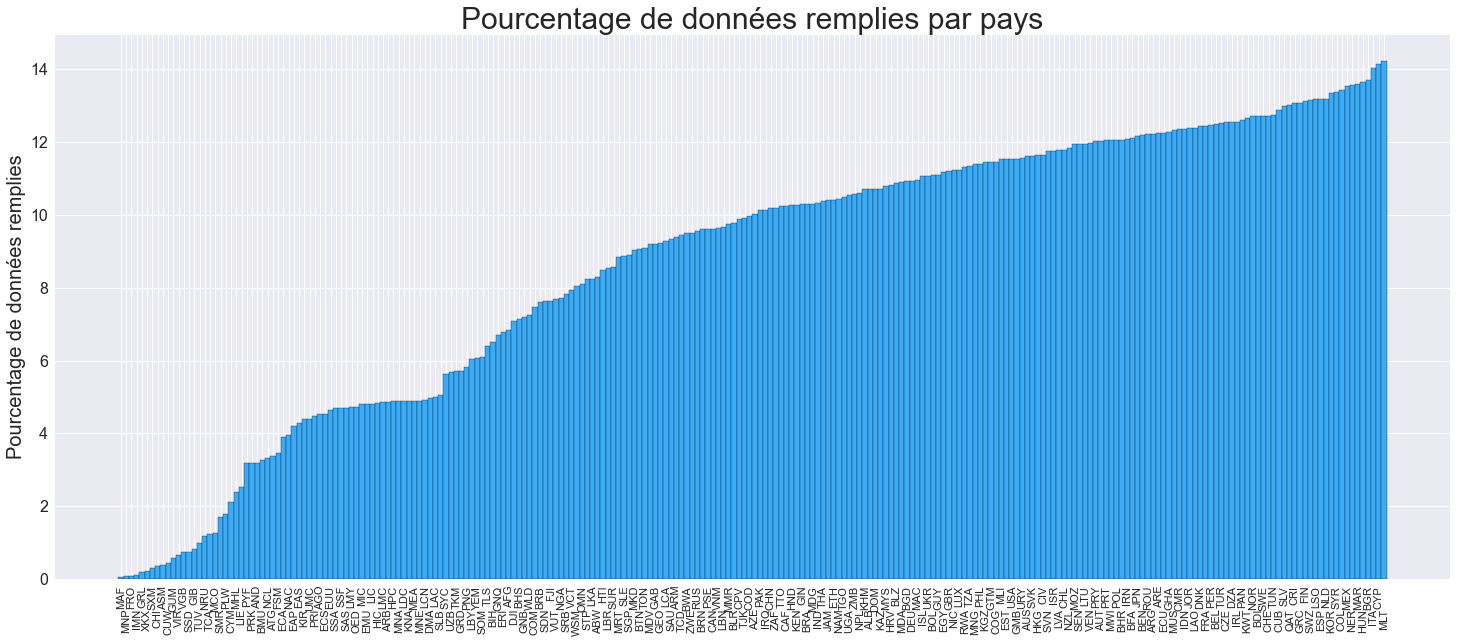

242


In [58]:
############# DESCRIPTION #############
#data / data_filtered

data=Data.drop(columns=['Country Name','Indicator Name','Indicator Code'])
values=data.groupby('Country Code').count()
score=values.sum(axis=1)/(values.shape[1]*data.groupby('Country Code').size())*100
scoredf=pd.DataFrame(score,columns=['val'])

scoredf.sort_values(by=['val'],inplace=True)


fig, ax = plt.subplots(figsize=(25,10))
plt.style.use('seaborn')
plt.bar(scoredf.index,scoredf['val'],color='#3AABF7',edgecolor='black',width=1)
plt.xticks(rotation='vertical',size=11)
for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
plt.yticks(size=16)
plt.ylabel('Pourcentage de données remplies',size=20)
plt.title('Pourcentage de données remplies par pays',size=30)
plt.savefig("remplissagecolonnesAVANT.png")
plt.show()
print(score.shape[0])

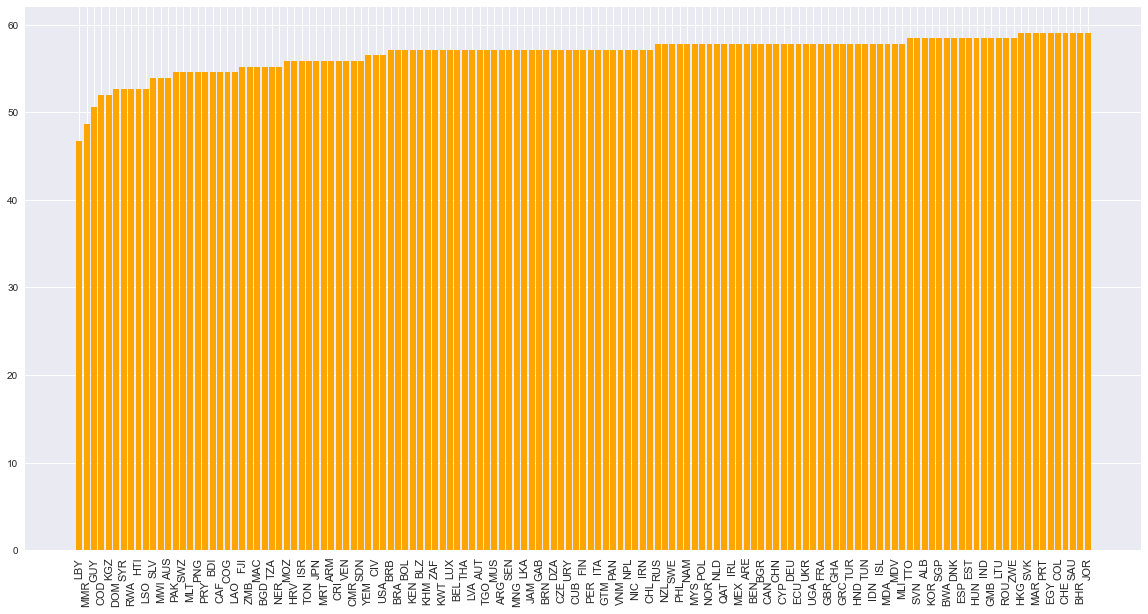

In [59]:
data2=data_filtered.drop(columns=['Country Name','Indicator Name','Indicator Code'])
values2=data2.groupby('Country Code').count()
score2=values2.sum(axis=1)/(values2.shape[1]*data2.groupby('Country Code').size())*100
scoredf2=pd.DataFrame(score2,columns=['val'])

scoredf2.sort_values(by=['val'],inplace=True)

fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('seaborn')
plt.xticks(rotation='vertical',size=11)
plt.bar(scoredf2.index,scoredf2['val'],color='orange')
for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
plt.show()

In [60]:
dupl=Data.duplicated(keep=False)
for dup in dupl:
    if dup==True:
        print('oh_no.jpg')
#y a rien lulz

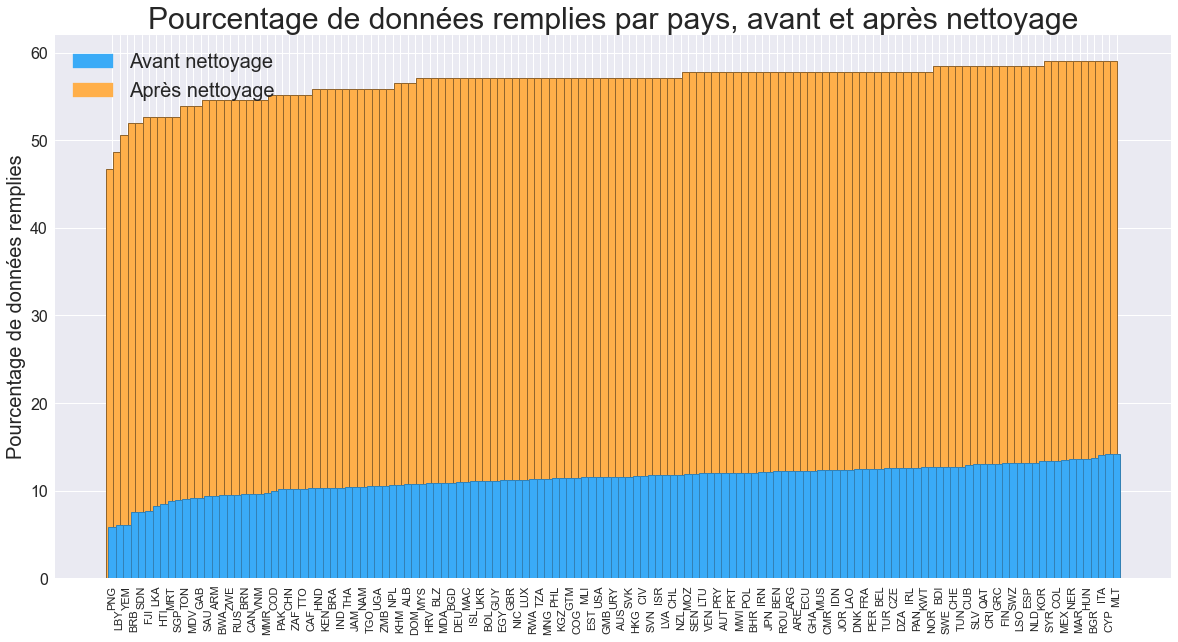

In [61]:
ndx = set(scoredf.index) & set(scoredf2.index)
scoredf_p = scoredf.loc[ndx]
scoredf2_p = scoredf2.loc[ndx]
scoredf_p.sort_values(by=['val'],inplace=True)
scoredf2_p.sort_values(by=['val'],inplace=True)

fig, ax = plt.subplots(figsize=(20,10))
#plt.figure(figsize=(20,10))
barWidth=0.5
r1 = np.arange(len(scoredf_p.index))
r2 = [x - barWidth*0.75 for x in r1]
plt.style.use('seaborn')
plt.bar(r2, scoredf2_p['val'], color='#FFAF4A', width=1,  label='var2',edgecolor='#91652D',linewidth=1) 
plt.bar(scoredf_p.index, scoredf_p['val'], color='#3AABF7', width=1,  label='var1',edgecolor='#3381B5',linewidth=1)

plt.xticks(rotation='vertical',size=11)

for tick in ax.xaxis.get_major_ticks()[1::2]: #décalage 1 sur 2 ticks
    tick.set_pad(30)
### Légendes des catégories
colors = {'Avant nettoyage':'#3AABF7', 'Après nettoyage':'#FFAF4A'}       #dictionnaire  
labels = list(colors.keys())
rect = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(rect, labels,fontsize=20)

plt.yticks(size=16)
plt.ylabel('Pourcentage de données remplies',size=20)
plt.title('Pourcentage de données remplies par pays, avant et après nettoyage',size=30)
plt.savefig("remplissagecolonnescomparaison.png")
plt.show()



In [62]:
#################### dernière valeur non-nulle #######################
def lastvalue(data: Series):
    val=data.size-1
    for dat in range(val,0,-1): # on décrémente sur la longueur de la Series
        if math.isnan(data[dat]) or dat==0: 
            continue
        else:
            return data[dat]   # return statement = sortie de fonction
#################### dernière valeur non-nulle ####################### 

BAR.NOED.15UP.ZS -> % de jeunes de 15 ans sans éducation

BAR.SEC.ICMP.15UP.ZS -> % de jeunes de 15 ans et plus avec éduc. secondaire, complète ou pas

BAR.TER.ICMP.15UP.ZS -> % de jeunes de 15 ans et plus avec éduc. tertiaire, complète ou pas

IT.NET.USER.P2 -> % d'utilisateurs d'internet

IT.CMP.PCMP.P2 -> % de possesseurs d'ordi personnels

SP.POP.1524.TO.UN -> Total de pop. âge 15-24

NY.GDP.PCAP.CD -> PIB par habitant

France, Finlande, Allemagne - Pays pour tester la val du score sur des pays bons candidats

Mozambique, Burundi, Niger - Pays pour tester la val du score sur des pays pas bons candidats

In [63]:
countryCodes=data_filtered["Country Code"].unique() #on redéfini pr avoir que ceux qu'on garde

#data_group=pd.MultiIndex.from_tuples(tuples, names=["Country Code", "second"])
ccode=[] #country code
ind=[] # indicator code
val=[]
for ndx in data_filtered.index.tolist():
    lval=lastvalue(data_filtered.loc[ndx])
    val.append(lval)
    ccode.append(data_filtered.iloc[ndx,0])
    ind.append(data_filtered.iloc[ndx,3])
    
arrays=[ccode,ind]

df=pd.DataFrame(val,columns=['val'],index=arrays)  # df multi-index
### récup ttes les lastvalues et les country names + indicator codes -> tada => ok
# Puis mettre en place le score (cf brouillon)

df


val
ALB BAR.NOED.15UP.ZS      3.280000e+00
    BAR.SEC.ICMP.15UP.ZS  8.578000e+01
    BAR.TER.ICMP.15UP.ZS  1.590000e+00
    NY.GDP.PCAP.CD        4.124982e+03
    IT.NET.USER.P2        6.636344e+01
...                                ...
ZWE BAR.TER.ICMP.15UP.ZS  7.500000e-01
    NY.GDP.PCAP.CD        1.029077e+03
    IT.NET.USER.P2        2.311999e+01
    IT.CMP.PCMP.P2        7.431140e+00
    SP.POP.1524.TO.UN     3.333716e+06

[959 rows x 1 columns]

In [64]:
##################### Score ###################
# df.loc[('ALB','BAR.NOED.15UP.ZS'),'val'] #-> accès à une valeur
# df.xs('BAR.NOED.15UP.ZS', level=1, drop_level=False)['val'].values #-> accès à ttes les val d'une var pour tt les pays

X = df.xs('SP.POP.1524.TO.UN', level=1, drop_level=False)['val'].values * df.xs('IT.NET.USER.P2', 
                                                                                level=1, drop_level=False)['val'].values
ternetpop = (X - X.min()) / (X.max() - X.min()) 
#estimation de la pop entre 15-24 ans avec accès internet normalisé entre 0 et 1
ndx=df.index.get_level_values(0).unique().tolist()

tpop=pd.DataFrame(ternetpop,index=ndx,columns=['val'])
tpop

Y=df.xs('NY.GDP.PCAP.CD', level=1, drop_level=False)['val'].values
pib=(Y - Y.min()) / (Y.max() - Y.min()) * 20
################### first test #####################

sec=df.xs('BAR.SEC.ICMP.15UP.ZS', level=1, drop_level=False)['val'].values
ter=df.xs('BAR.TER.ICMP.15UP.ZS', level=1, drop_level=False)['val'].values
ppc=df.xs('IT.CMP.PCMP.P2', level=1, drop_level=False)['val'].values
#pib=df.xs('NY.GDP.PCAP.CD', level=1, drop_level=False)['val'].values


#Score1=( (2*(sec+ter)+ppc)/5 ).tolist() 
Score1=( (2*(sec+ter)+ppc+pib)/6 ).tolist() 
Score2=(( (2*(sec+ter)+ppc+pib)/6 )* tpop['val']*100).tolist()
scores=[Score1,Score2]
dfscores=pd.DataFrame(scores,columns=ndx,index=['Score1','Score2']).transpose()
dfscores

#print(max(Score1),min(Score1))
#print(max(Score2),min(Score2))
dfscore1=pd.DataFrame(Score1,index=ndx,columns=['Score1'])
dfscore2=pd.DataFrame(Score2,index=ndx,columns=['Score2'])
dfscore1.sort_values(by=['Score1'],inplace=True)
dfscore2.sort_values(by=['Score2'],inplace=True)

flop10_1=dfscore1[:10]
top10_1=dfscore1[-10:]
flop10_2=dfscore2[:10]
top10_2=dfscore2[-10:]

top10_1.reset_index(inplace=True)
top_1=top10_1.rename(columns={'index':'top10_1'})
top10_2.reset_index(inplace=True)
top_2=top10_2.rename(columns={'index':'top10_2'})
flop10_1.reset_index(inplace=True)
flop_1=flop10_1.rename(columns={'index':'flop10_1'})
flop10_2.reset_index(inplace=True)
flop_2=flop10_2.rename(columns={'index':'flop10_2'})

ft=[top_1,flop_1,top_2,flop_2]
dfft=pd.concat(ft,axis=1)
dfft

,top10_1,Score1,flop10_1,Score1,top10_2,Score2,flop10_2,Score2
0,GBR,43.009756,NER,2.438582,PHL,252.008745,TON,0.000000
1,SVK,43.020525,MOZ,2.767369,MEX,274.673942,CAF,0.210759
2,FIN,43.105555,BDI,3.541366,GBR,300.321697,NER,0.328551
3,DEU,43.629651,SEN,4.141857,DEU,323.628394,BDI,0.334007
4,NOR,44.146771,TZA,4.482550,RUS,361.257913,MDV,0.589149
5,SWE,45.355837,RWA,4.872168,JPN,400.086373,BLZ,0.622331
6,NLD,46.479776,MLI,4.897396,BRA,406.102682,BRB,0.654257
7,USA,47.525517,PNG,5.402615,IND,1187.424476,PNG,0.714328
8,CAN,48.646191,MWI,5.922851,USA,1559.080049,GMB,0.738932
9,CHE,50.414331,SDN,6.032536,CHN,2484.189512,MRT,0.752689


In [65]:
dfft.to_csv(r'TopsFlops.csv')

In [83]:
dfscore1.reset_index(inplace=True)
dfscore2.reset_index(inplace=True)
dfsc2=dfscore2.rename(columns={'index':'Classement 2'})
dfsc1=dfscore1.rename(columns={'index':'Classement 1'})
sc=[dfsc1,dfsc2]
dfall=pd.concat(sc,axis=1)
dfall.to_csv(r'ClassementFinal.csv')

In [84]:
dfall.head()

,level_0,Classement 1,Score1,level_0,Classement 2,Score2
0,0,NER,2.438582,0,TON,0.000000
1,1,MOZ,2.767369,1,CAF,0.210759
2,2,BDI,3.541366,2,NER,0.328551
3,3,SEN,4.141857,3,BDI,0.334007
4,4,TZA,4.482550,4,MDV,0.589149


 Faire des plots sur mes stats finales aussi ? genre boxplots
 Boxplots sur les data de départ
 Et aussi résultat de Describe, voir quoi en faire

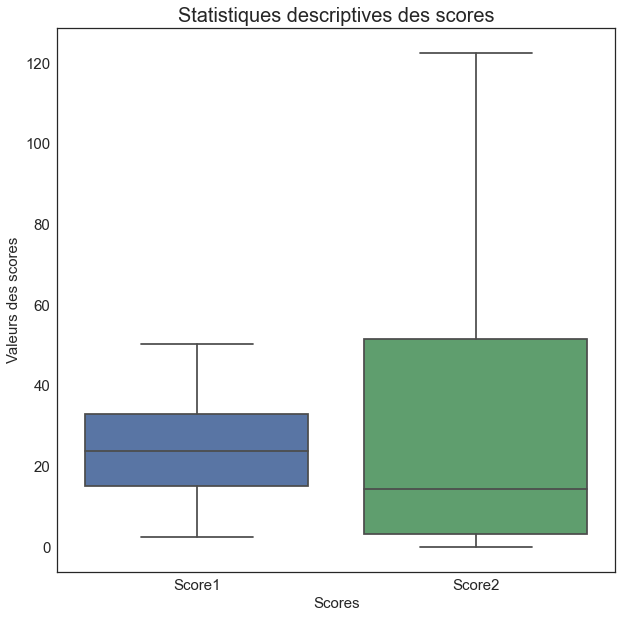

In [85]:
dfbox=pd.melt(dfall[['Score1','Score2']])
dfbox

plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", data=dfbox,showfliers=False)
plt.title('Statistiques descriptives des scores',size=20)
plt.ylabel('Valeurs des scores',size=15)
plt.xlabel('Scores',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('statscores.png')
plt.show()

In [86]:
regions=['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
        'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)']
income=['High income','Middle income',
       'Low income']

Data2=Data
Data2.set_index('Country Name',inplace=True)

a=Data2.loc[regions]
#a.set_index('Indicator Code',inplace=True)
b=a['Indicator Code'].str.contains(varFinal)

C:\Users\CAMILL~1.BES\AppData\Local\Temp/ipykernel_1780/1854248539.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  b=a['Indicator Code'].str.contains(varFinal)


In [87]:
b=a[a['Indicator Code']=='NY.GDP.PCAP.CD']
b.drop(columns=['Indicator Name'],inplace=True)
bt=b.transpose()
bt.replace(0,np.nan, inplace=True)
bt.dropna(axis=1,thresh=3,inplace=True)
bt.to_csv(r'ohno.csv')

C:\Users\camille.besancon\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
btt=bt.iloc[2:,:]
#half1 = btt.iloc[:, [i for i in range(len(btt.columns)) if i%2 == 1]] #impair, % utilisateurs internet
#half2 = btt.iloc[:, [i for i in range(len(btt.columns)) if i%2 == 0]] #pair, % de gens avec un pc personnel
#dfb=half1.melt()
#dfb2=half2.melt()
dfb=btt.melt()

In [89]:
btt

Country Name,Arab World,East Asia & Pacific,East Asia & Pacific (excluding high income),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),European Union,Heavily indebted poor countries (HIPC),Latin America & Caribbean,Latin America & Caribbean (excluding high income),Least developed countries: UN classification,Middle East & North Africa,Middle East & North Africa (excluding high income),North America,OECD members,South Asia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income)
1970,250.488643,316.225712,114.138515,2231.949573,1365.643199,NaN,1936.26671,152.409191,612.72044,581.413101,NaN,296.533502,NaN,5140.490459,2677.224756,118.865351,223.661739,223.652646
1971,283.248047,341.976701,119.431083,2515.596733,1528.448449,NaN,2178.234224,160.109127,668.551653,630.155632,NaN,333.085864,NaN,5525.142965,2930.793243,123.495077,221.681698,221.660236
1972,328.69287,414.419302,132.172416,3018.225027,1816.387284,NaN,2592.568066,168.920037,733.303747,695.471503,NaN,395.799472,NaN,6017.694952,3361.42615,121.240477,243.22589,243.180408
1973,406.804635,534.343604,162.667008,3892.275241,2288.484922,NaN,3271.150802,198.11932,937.007623,885.206304,NaN,518.641984,NaN,6657.814444,4017.311649,135.483424,302.681409,302.632378
1974,758.562998,602.49143,179.964175,4387.668484,2565.851489,NaN,3660.79816,236.674571,1187.516346,1148.319275,NaN,918.846241,NaN,7222.982749,4453.728765,160.391093,386.078873,386.034028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


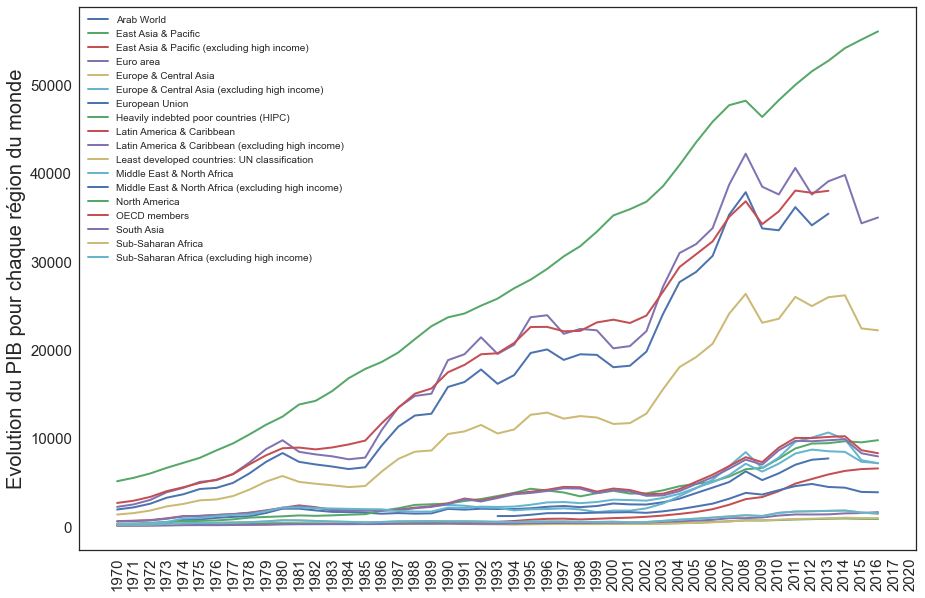

In [103]:
year=btt.index.tolist()

fig, ax = plt.subplots(figsize=(15,10))
plt.style.use('seaborn-white')

for col in btt.columns.tolist():
    plt.plot(year,btt[col],linewidth=2,label=col)

plt.xticks(rotation='vertical',size=15)
plt.yticks(size=15)

plt.legend()
plt.ylabel("Evolution du PIB pour chaque région du monde",size=20)
plt.savefig('courbes_pib.png')
plt.show()

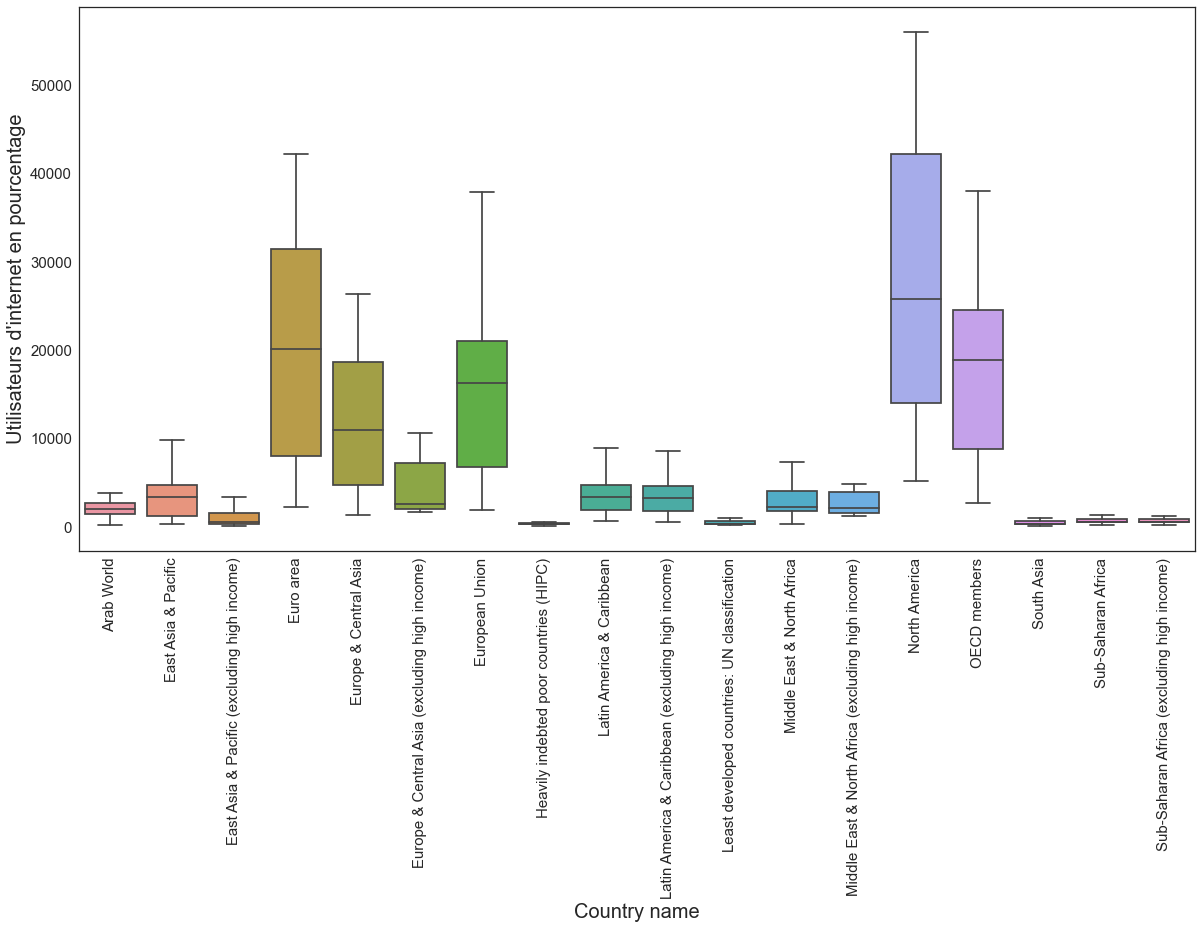

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('seaborn')
sns.boxplot(x="Country Name", y="value", data=dfb,showfliers=False)
plt.xticks(rotation='vertical',size=15)
plt.yticks(size=15)
plt.xlabel('Country name',size=20)
plt.ylabel("Utilisateurs d'internet en pourcentage",size=20)
plt.savefig('boxplot_pib.png')

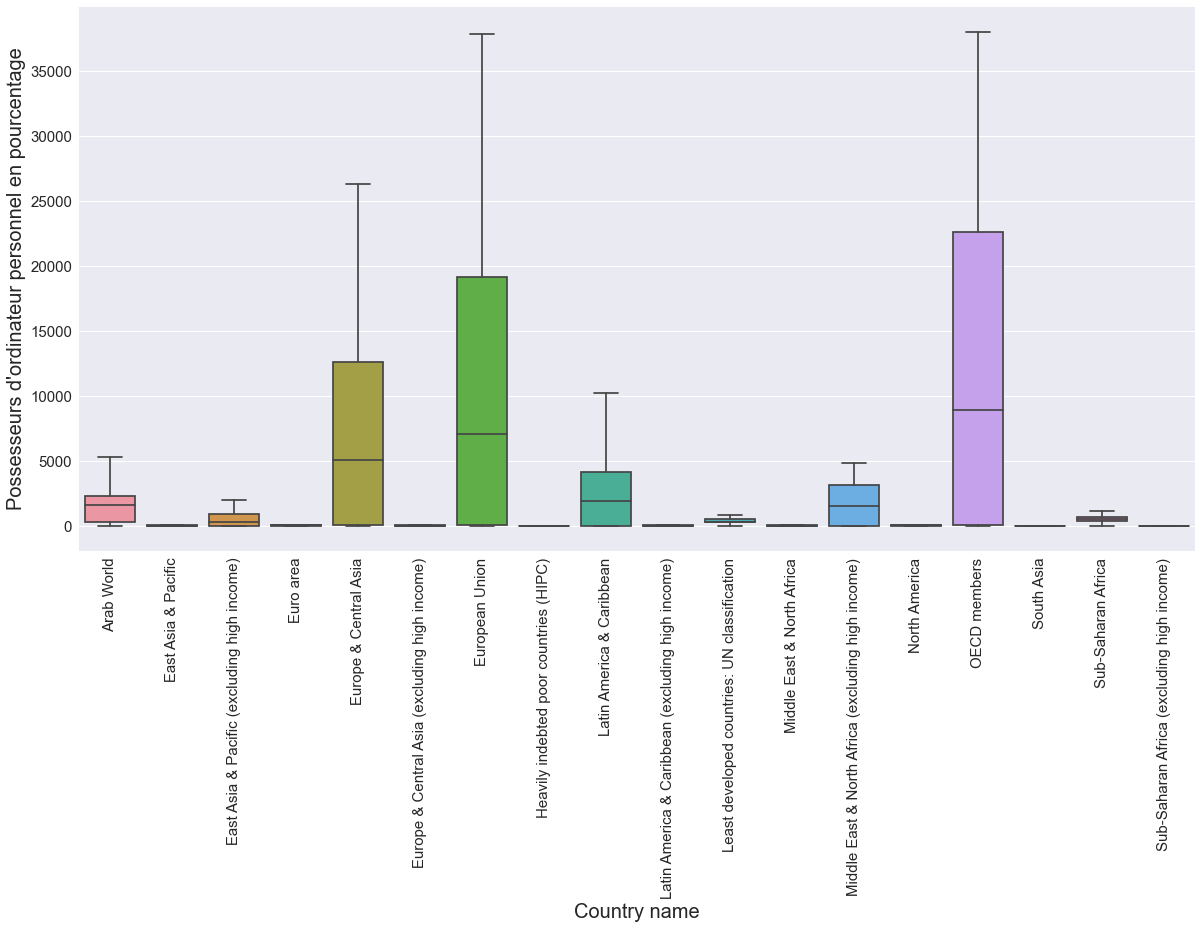

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('seaborn')
sns.boxplot(x="Country Name", y="value", data=dfb2,showfliers=False)
plt.xticks(rotation='vertical',size=15)
plt.yticks(size=15)
plt.xlabel('Country name',size=20)
plt.ylabel("Possesseurs d'ordinateur personnel en pourcentage",size=20)
plt.savefig('ordiperso.png')